In [12]:
#const
import numpy as np

TOLERANCIA_RELATIVA = 0.05
TOLERANCIA_ABSOLUTA = 0.002
EPSILON_MAQUINA = np.finfo(float).eps

In [13]:
# **********************************
# SIMULADOR GRÁFICO
# **********************************
%matplotlib notebook

#simulador.clima
from random import shuffle
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class SimuladorGrafico:
    def __init__(self, planetas):
        self.planetas = planetas
        self.color = np.arange(100)

    def simular_dia(self, dia):
        
        colores = ['purple' , 'deepskyblue', 'lime', 'forestgreen', 'aqua']
        
        fig, ax = plt.subplots()
        fig = matplotlib.pyplot.gcf()
        #fig.canvas.set_window_title("Posición planetas el día")
        fig.set_size_inches(7, 7)
        fig.savefig('galaxy.png', dpi=200)
        fig.set_size_inches(7, 7, forward=True)
        
        rect = [0.111, 0.1029, 0.8049, 0.78]
        
        # coordenadas polares
        ax_polar = fig.add_axes(rect, projection='polar', frameon=False)
        ax_polar.set_theta_zero_location("N") # Posición Norte.
        ax_polar.set_rmax(2000)
        ax_polar.set_yticklabels([])
        
        # limites plano cartesiano
        ax.set_xlim(-2010, 2010)
        ax.set_ylim(-2010, 2010)
        
        # Sol enano...
        ax.scatter(0, 0, color='y', s=300)
        
        legends = []
        
        for planeta in self.planetas:
            x, y = planeta.get_coordenadas_dia(dia)
            shuffle(colores)
            color = colores.pop()
            legends.append(mpatches.Patch(color=color, label=planeta.nombre)) 
            ax.scatter(x, y, s=90, color=color)
            # logging.debug("planeta!!-->{:f}, {:f}".format(x, y))

        plt.legend(handles=legends)
        plt.show()
        return plt
  

In [14]:
# **********************************
# PLANETA....
# **********************************
import logging
import numpy as np

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)


class Planeta:
    def __init__(self, nombre, velocidad, sol_distancia, giro_horario=True):
        self.nombre = nombre
        self.giro = -1 if giro_horario else 1
        self.velocidad = velocidad
        self.sol_distancia = sol_distancia
    
    def __str__(self):
        return "Planeta:{}. velocidad:{:d}".format(self.nombre, self.velocidad * self.giro)
    
    @property
    def velocidad_angular(self):
        return self.velocidad * self.giro

    def get_posicion_dia(self, dia):
        angulo = (self.velocidad_angular * dia) %360
        return np.deg2rad(angulo)

    def get_coordenadas_dia(self, dia):
        pos = self.get_posicion_dia(dia)
        
        x = self.sol_distancia * np.sin(pos)
        y = self.sol_distancia * np.cos(pos)
        #logging.debug("Planeta:{}.  x={:f}, y={:f}".format(self.nombre, x, y))
        
        return Punto(x, y)

In [15]:
# **********************************
# PUNTO.....
# **********************************

import math

from collections import namedtuple

Punto = namedtuple('Punto', ['x', 'y'])

def get_distancia_entre(punto1, punto2):
    x = np.power(punto2.x - punto1.x, 2)
    y = np.power(punto2.y - punto1.y, 2)
    distancia = np.sqrt(x+y)
    return distancia

def is_colineal4(punto1, punto2, punto3):
    a, b, c = punto1, punto2, punto3
    area2 = (b.x-a.x)*(c.y-a.y) - (b.y-a.y)*(c.x-a.x);
    
    print('AREAAAA--->', area2)
    if area2 < 0:
        return -1;
    elif area2 > 0:
        return +1;
    elif area2 > 0:
        return 0;
    
def is_colineal3(punto1, punto2, punto3):
    # s = (y2 - y1) * x + (x1 - x2) * y + (x2 * y1 - x1 * y2);
    x, y = punto1
    x1, y1 = punto2
    x2, y2 = punto3
    s = np.abs((y2 - y1) * x + (x1 - x2 * y + (x2 * y1 - x1 * y2)))
    
    print('valor--S', s)
    if(s < 4.7 and s >4.2):
        return False
    
    elif(s>0):
        return False

    return True

def is_colineal2(punto1, punto2, punto3):
    x1, y1 = (punto2.x -punto1.x), (punto2.y - punto1.y )
    x2, y2 = (punto3.x - punto1.x), (punto3.y - punto1.y)
    
    return (x1 * y2) - (x2 * y1) < 0.1

def is_colineal(punto1, punto2, punto3):
    """
    Comprobar si tres puntos son colineales.
    está solución es precisa y exclusiva para float's, requiere una tol relativa y absoluta
    e ignora la alineación de puntos en pendientes de tipo: "indeterminadas" y "cero".
    Requiere una tolerancia relativa y absoluta.    
    """
    x1, y1 = punto1
    x2, y2 = punto2
    x3, y3 = punto3
    
    pendiente1 = (y2-y1) / (x2-x1)
    pendiente2 = (y3-y2) / (x3-x2)
    pendientediff = pendiente1 - pendiente2
    
    return (pendientediff <= TOLERANCIA_RELATIVA and pendientediff > TOLERANCIA_ABSOLUTA)

# def is_colineal_a_origen()
def is_colineal_con_origen(punto1, punto2, punto3, origen=Punto(0, 0)):
    """
    Comprobar si tres puntos están alineados con respecto al origen.
    
    """
    x1, y1 = punto1
    x2, y2 = punto2
    x3, y3 = punto3
    x4, y4 = origen
    
    # todo evito calculos por distancia.sqrt o area=0
    product1 = (x2 - x1)*(y3 - y1) - (x3 - x1)*(y2 - y1)
    
    if isclose(product1, 0, abs_tol=TOLERANCIA_RELATIVA):
        product2 =(x2 - x1)*(y4 - y1) - (x4 - x1)*(y2 - y1) 
        return isclose(product2, 0, abs_tol=TOLERANCIA_RELATIVA)
    
    return False


def distancia_entre1(p1, p2):
    return np.hypot(p1.x - p2.x, p1.y -p2.y)

def ccw1(a, b, c):
    area2 = (b.x-a.x) * (c.y-a.y) - (b.y-a.y) * (c.x-a.x)
    
    if(area2 < 0.0):
        return -1
    elif(area2 >0.0):
        return 1
    else:
        return 0
    
    return area2


In [17]:
# **********************************
# TRIÁNGULO....
# **********************************
import math
import numpy as np

Triangulo = namedtuple('Triangulo', ['vertice_a', 'vertice_b', 'vertice_c'])

def get_area(triangulo):
    """
    Retorna el área del triangulo.
    """
    a, b, c = triangulo.vertice_a, triangulo.vertice_b, triangulo.vertice_c      
    return np.abs((a.x -c.x) * (b.y - a.y) - (a.x - b.x) * (c.y - a.y))


def get_perimetro(triangulo):
    """
    Retorna el perimetro del triangulo.
    """
    t = triangulo
    ab_distancia = get_distancia_entre(t.vertice_a, t.vertice_b)
    bc_distancia = get_distancia_entre(t.vertice_b, t.vertice_c)
    ac_distancia = get_distancia_entre(t.vertice_a, t.vertice_c)
    
    potencia = ab_distancia ** 2 + bc_distancia ** 2
    cateto = ac_distancia ** 2
    
    return ab_distancia + bc_distancia + ac_distancia


def is_punto_dentro(triangulo, punto=Punto(0,0)):
    """
    Retorna True si el punto dado está dentro del triángulo.
    dado un triángulo con vertices: a,b,c y un punto: p => el punto
    está dentro si y "solo" sí: abc == abp + apc + pbc
    """
    p = punto
    # descomposición del triángulo en vertices
    a = triangulo.vertice_a
    b = triangulo.vertice_b
    c = triangulo.vertice_c
    
    # triángulos
    abc = get_area(Triangulo(a,b,c))
    abp = get_area(Triangulo(a, b, p))
    apc = get_area(Triangulo(a, p, c))
    pbc = get_area(Triangulo(p, b, c))
    
    # todo #debt si no se tratara del origen...habría que agregar mprecisión
    return abc == abp + apc + pbc

In [18]:
"""
ferengi = Planeta(nombre='Ferengi', velocidad=1, sol_distancia=500)
vulcano = Planeta(nombre='Betasoide', velocidad=3, sol_distancia=2000)
betasoide = Planeta(nombre='Vulcano', velocidad=5, sol_distancia=1000, giro_horario=False)

"""

"\nferengi = Planeta(nombre='Ferengi', velocidad=1, sol_distancia=500)\nvulcano = Planeta(nombre='Betasoide', velocidad=3, sol_distancia=2000)\nbetasoide = Planeta(nombre='Vulcano', velocidad=5, sol_distancia=1000, giro_horario=False)\n\n"

In [29]:
b= [1213, 1241, 1242, 1260, 1278, 1279, 1307, 1324, 1350, 1376, 1393, 1421, 1422, 1440, 1458, 1459, 1487]

<IPython.core.display.Javascript object>


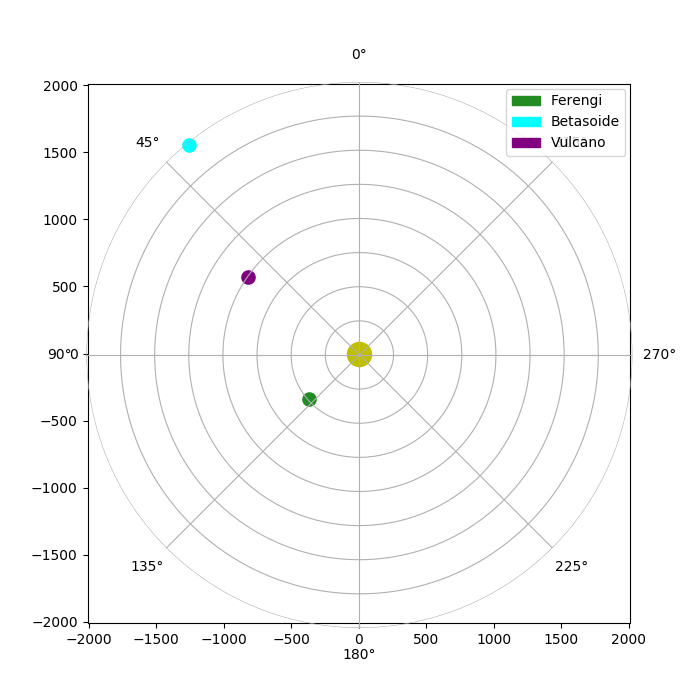

<IPython.core.display.Javascript object>


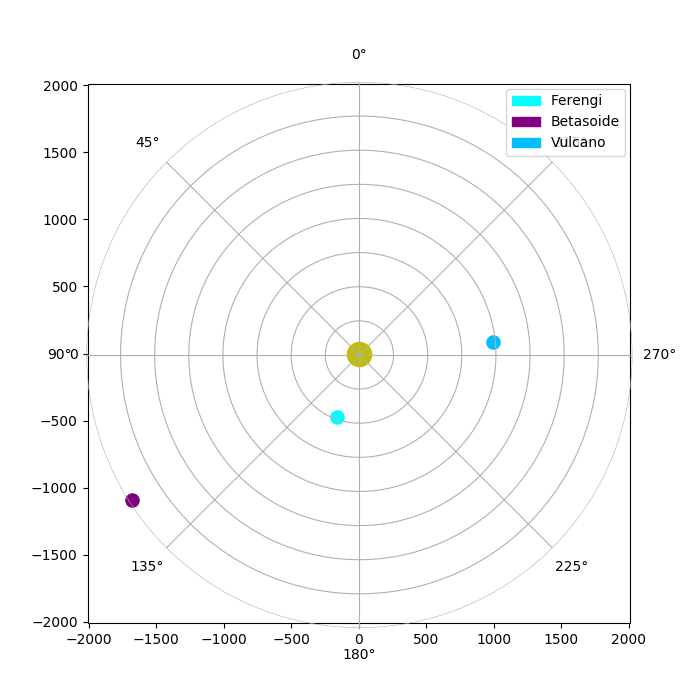

<IPython.core.display.Javascript object>


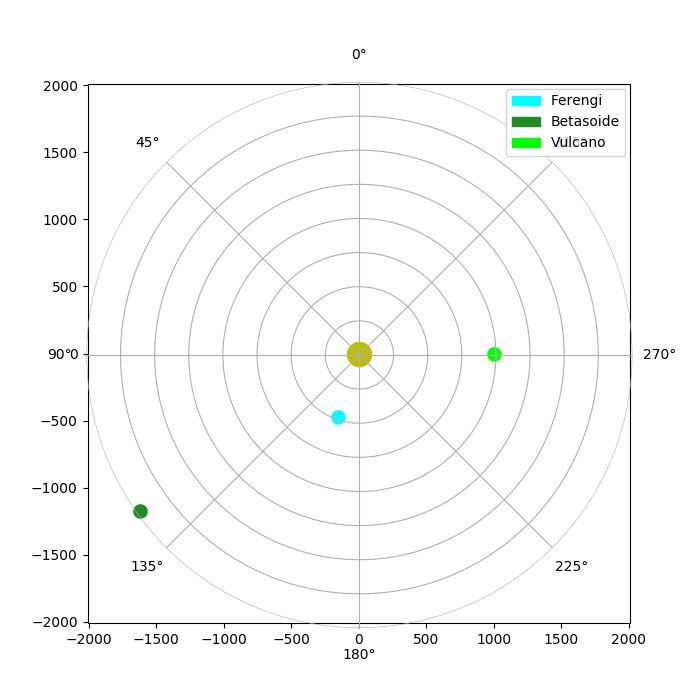

<IPython.core.display.Javascript object>


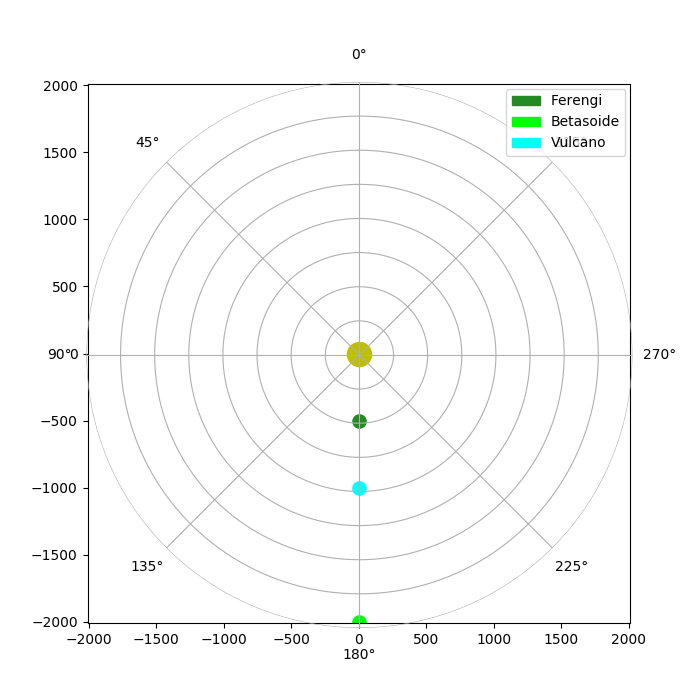

<IPython.core.display.Javascript object>


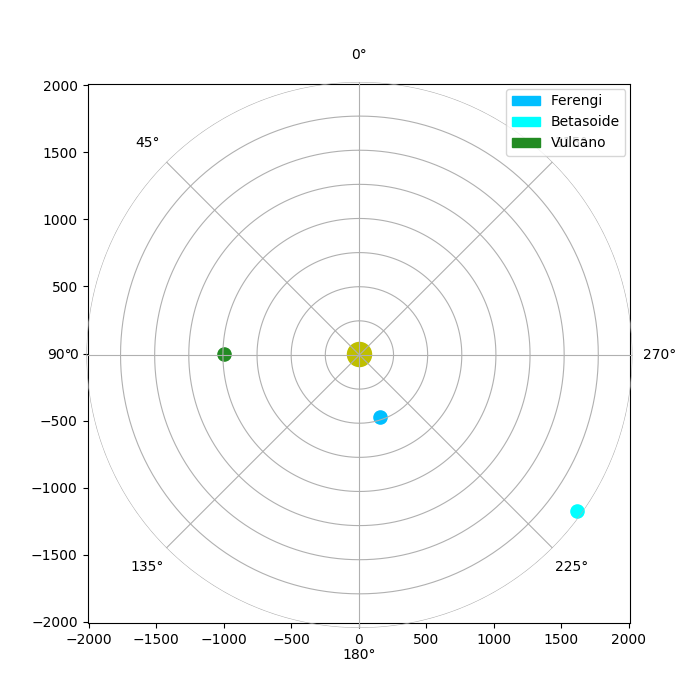

<IPython.core.display.Javascript object>


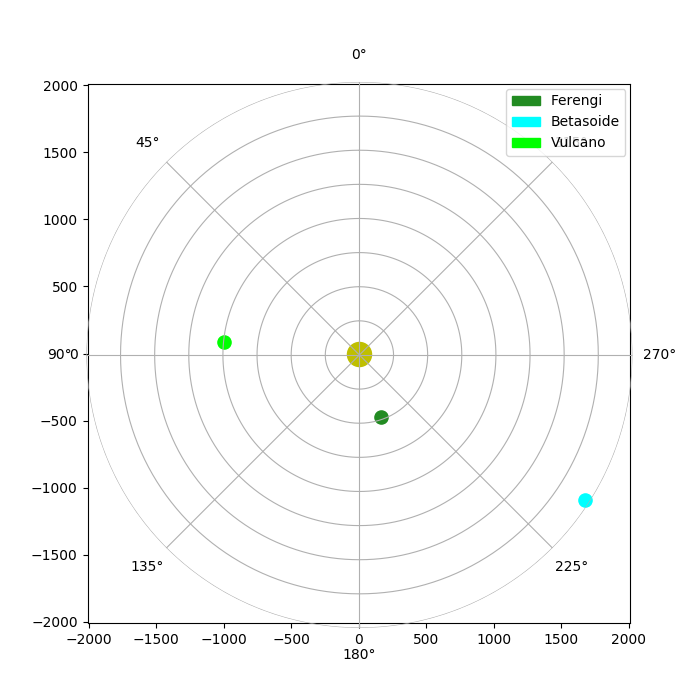

<IPython.core.display.Javascript object>


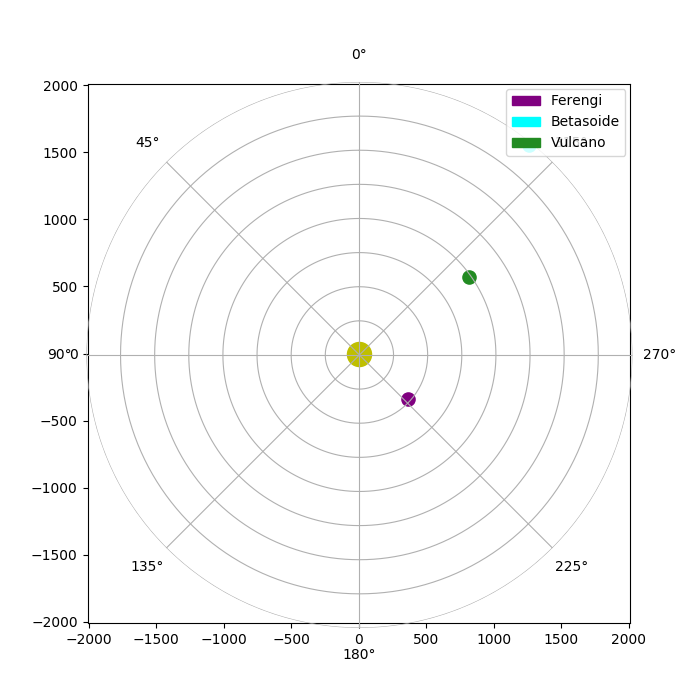

<IPython.core.display.Javascript object>


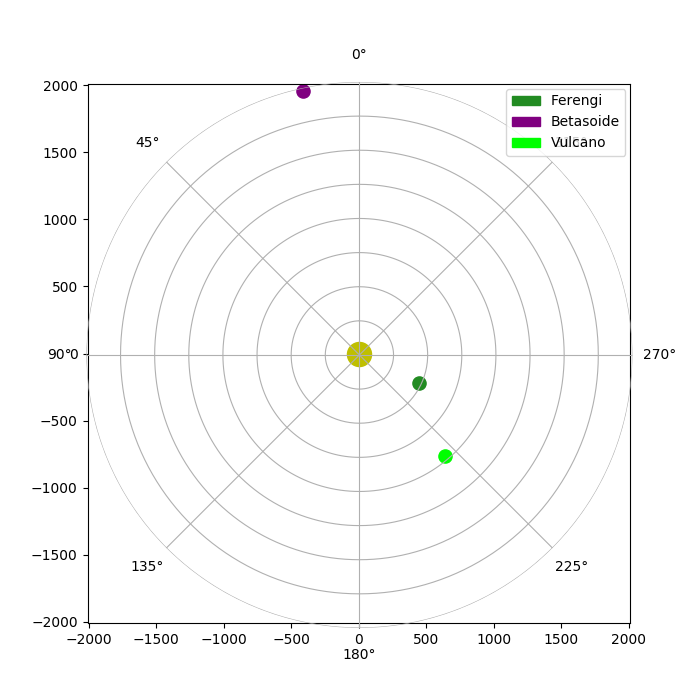

<IPython.core.display.Javascript object>


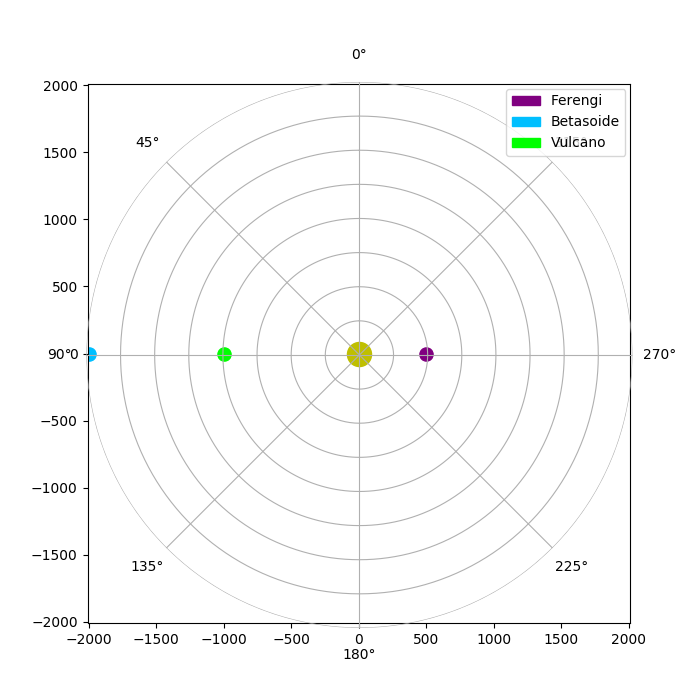

<IPython.core.display.Javascript object>


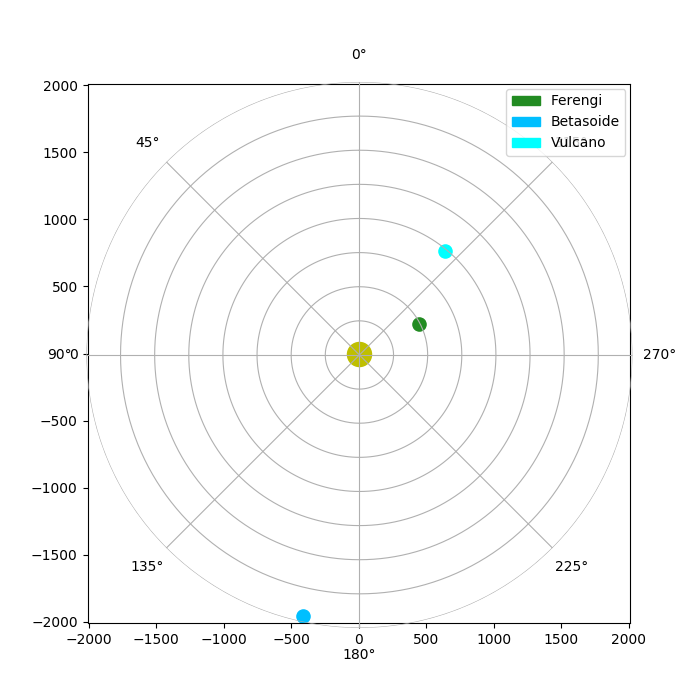

<IPython.core.display.Javascript object>


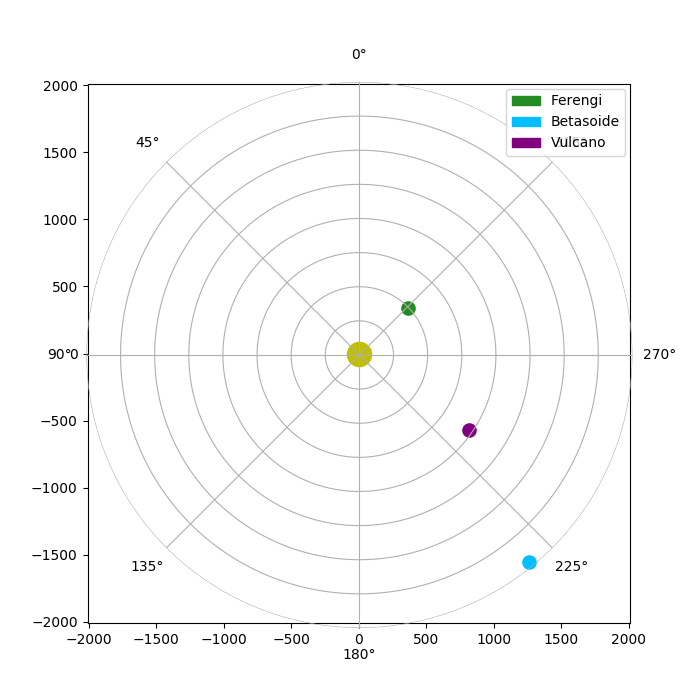

<IPython.core.display.Javascript object>


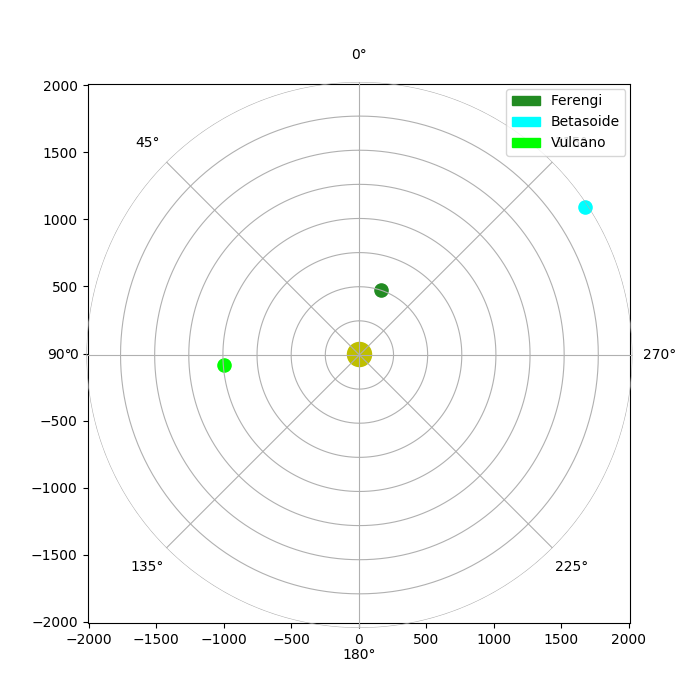

<IPython.core.display.Javascript object>


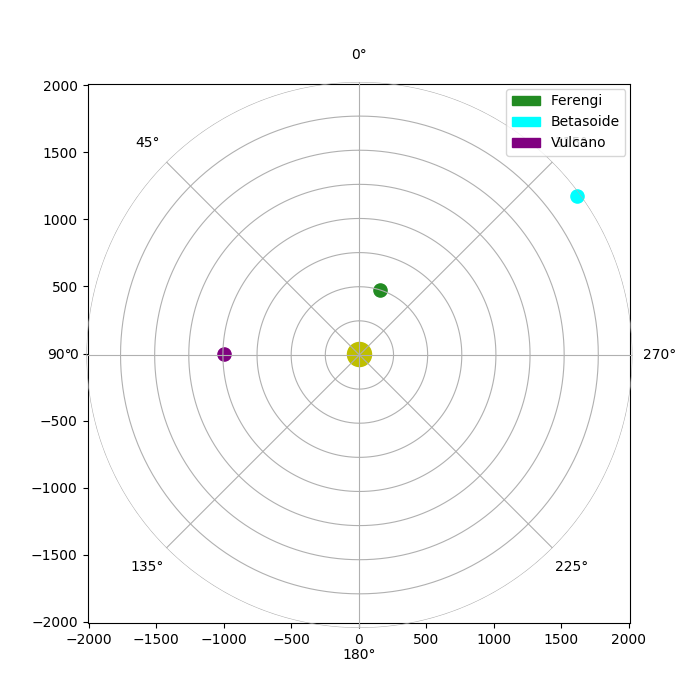

<IPython.core.display.Javascript object>


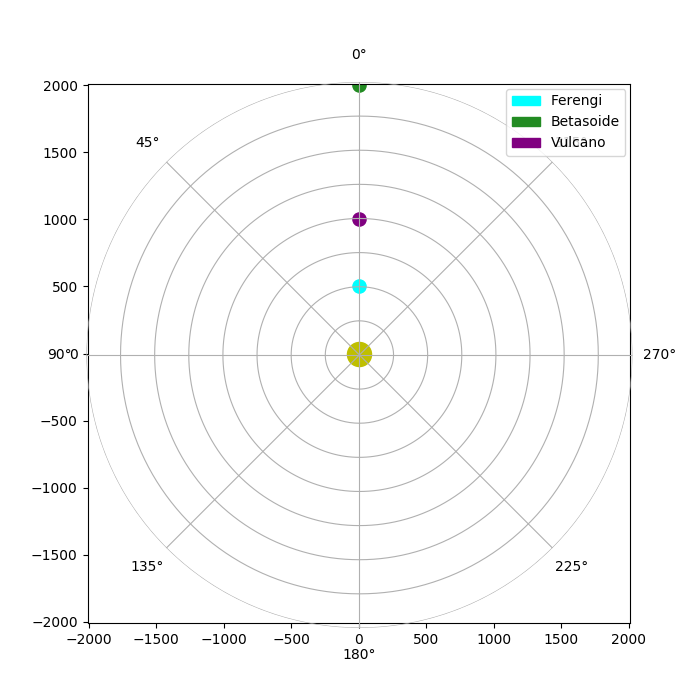

<IPython.core.display.Javascript object>


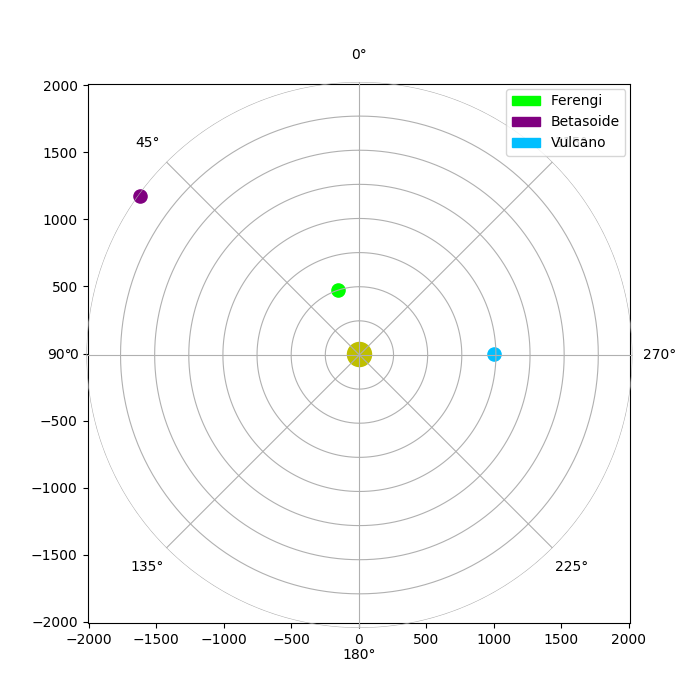

<IPython.core.display.Javascript object>


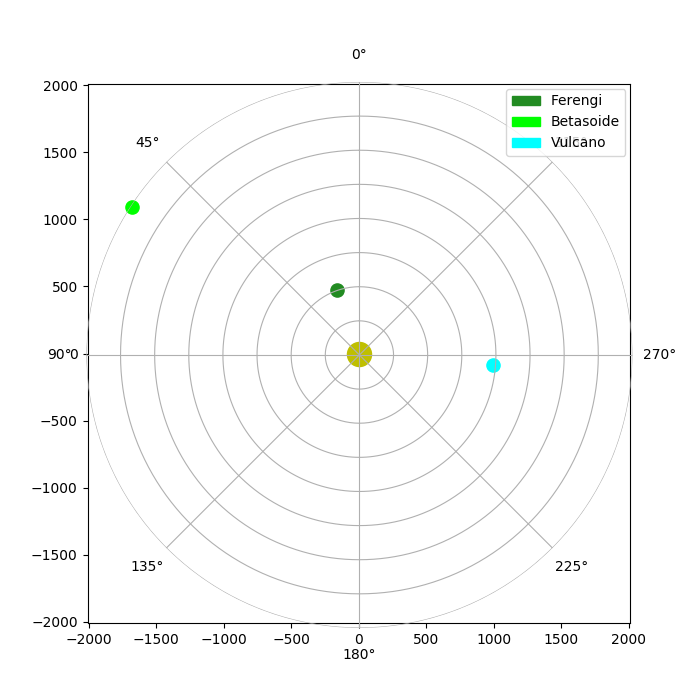

<IPython.core.display.Javascript object>


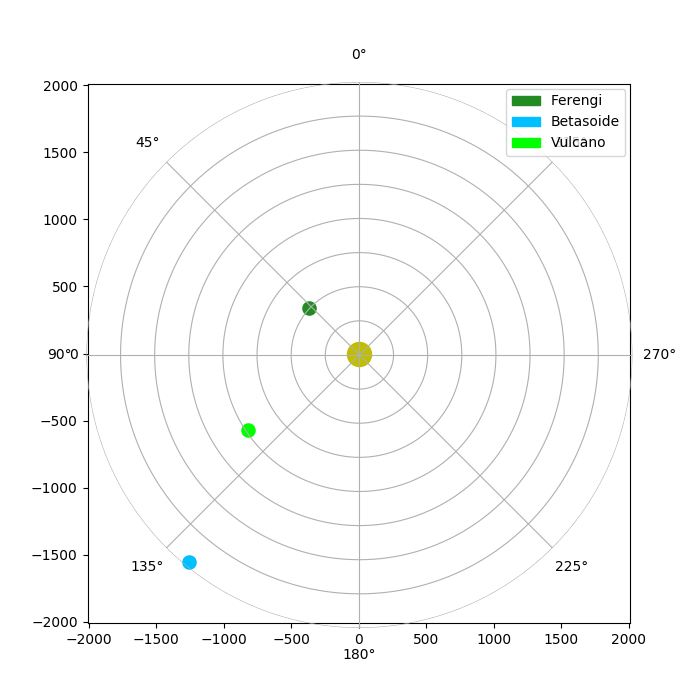

In [30]:
for dia in b:
    ferengi = Planeta(nombre='Ferengi', velocidad=1, sol_distancia=500)
    vulcano = Planeta(nombre='Betasoide', velocidad=3, sol_distancia=2000)
    betasoide = Planeta(nombre='Vulcano', velocidad=5, sol_distancia=1000, giro_horario=False)
    planetas = [ferengi, vulcano, betasoide]
    simulador = SimuladorGrafico(planetas)
    simulador.simular_dia(dia)

In [742]:
print(0.99+0.10)

1.09


In [700]:
print(np.abs(1.08448381587))

1.08448381587


In [755]:
print(math.isclose(2870.9395285, 2869.85504468, rel_tol=0.1))

True


In [97]:
b= [0, 18, 19, 46, 47, 48, 64, 89, 90, 91, 116, 132, 133, 134, 161, 162, 
    180, 198, 199, 226, 227, 228, 244, 269, 270, 271, 296, 312, 313, 314,
    341, 342, 360, 378, 379, 406, 407, 408, 424, 449, 450, 451, 476, 492,
    493, 494, 521, 522, 540, 558, 559, 586, 587, 588, 604, 629, 630, 631, 656, 
    672, 673, 674, 701, 702, 720, 738, 739, 766, 767, 768, 784, 809, 810, 811,
    836, 852, 853, 854, 881, 882, 900, 918, 919, 946, 947, 948, 964, 989, 990, 
    991, 1016, 1032, 1033, 1034, 1061, 1062, 1080, 1098, 1099, 1126, 1127, 1128, 
    1144, 1169, 1170, 1171, 1196, 1212, 1213, 1214, 1241, 1242, 1260, 1278, 1279,
    1306, 1307, 1308, 1324, 1349, 1350, 1351, 1376,
    1392, 1393, 1394, 1421, 1422, 1440, 1458, 1459, 1486, 1487, 1488]

In [98]:
len(b)

134

In [92]:
a = [0, 18, 19, 47, 64, 90, 116, 133, 161, 162, 180, 198, 199, 227, 244, 270,
 296, 313, 341, 342, 360, 378, 379, 407, 424, 450, 476, 493, 521, 522, 540, 
 558, 559, 587, 604, 630, 656, 673, 701, 702, 720, 738, 739, 767, 784, 810, 836, 
 853, 881, 882, 900, 918, 919, 947, 964, 990, 1016, 1033, 1061, 1062, 1080, 1098, 
 1099, 1127, 1144, 1170, 1196, 1213, 1241, 1242, 1260, 1278, 1279, 1307, 1324, 1350,
 1376, 1393, 1421, 1422, 1440, 1458, 1459, 1487]

In [93]:
len(a)

84

In [24]:
134 -84


50

In [ ]:
    """
